In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x=6*np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2+np.random.randn(100,1)

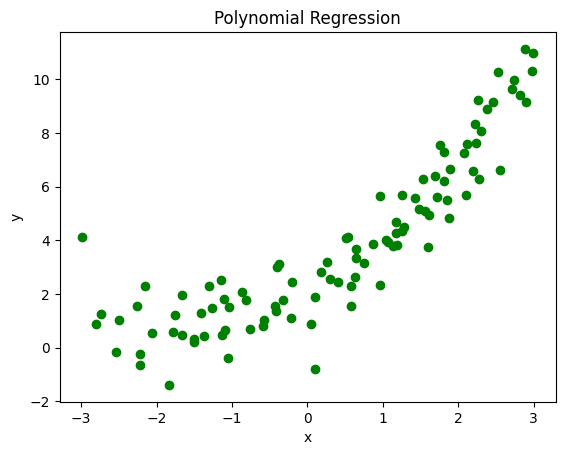

In [7]:
plt.scatter(x,y,color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
##let implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()
regression_1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))

In [11]:
score

0.7230506998295421

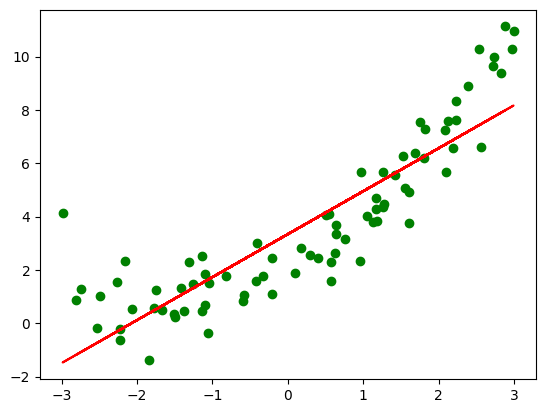

In [13]:
#lets visualize the linear regression
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train,color='g')

In [14]:
#let's implement polynomial regression
from sklearn.preprocessing import PolynomialFeatures


In [21]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


In [22]:
X_train_poly

array([[ 1.        ,  1.17317155,  1.3763315 ],
       [ 1.        , -1.83795863,  3.37809193],
       [ 1.        ,  2.55712219,  6.53887389],
       [ 1.        ,  1.16893876,  1.36641782],
       [ 1.        ,  0.17418504,  0.03034043],
       [ 1.        ,  1.1811625 ,  1.39514485],
       [ 1.        , -2.80447162,  7.86506109],
       [ 1.        ,  2.22320964,  4.94266112],
       [ 1.        , -1.31122761,  1.71931784],
       [ 1.        ,  0.95985766,  0.92132672],
       [ 1.        ,  1.5543151 ,  2.41589543],
       [ 1.        ,  2.73915052,  7.50294557],
       [ 1.        , -1.77705336,  3.15791864],
       [ 1.        ,  1.53218515,  2.34759132],
       [ 1.        ,  0.64042544,  0.41014474],
       [ 1.        ,  2.82463293,  7.97855116],
       [ 1.        ,  1.68576366,  2.84179912],
       [ 1.        ,  1.60151903,  2.56486321],
       [ 1.        , -0.81769336,  0.66862243],
       [ 1.        ,  1.04313798,  1.08813684],
       [ 1.        ,  2.12116872,  4.499

In [25]:
from sklearn.metrics import r2_score
regression_2=LinearRegression()
regression_2.fit(X_train_poly,y_train)
y_pred=regression_2.predict(X_test_poly)
score=r2_score(y_test,y_pred)
score


0.848997489646802

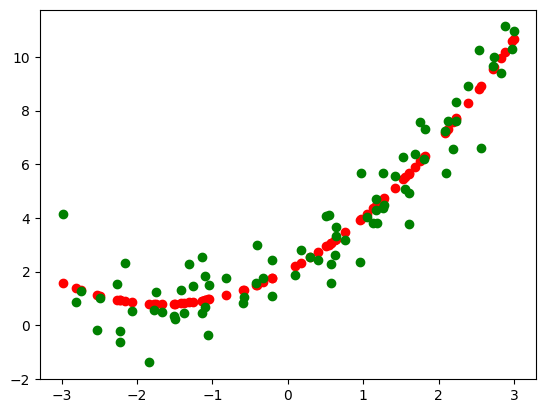

In [27]:
plt.scatter(X_train,regression_2.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train,color='g')

In [28]:
from sklearn.pipeline import Pipeline

In [34]:
def poly_regression(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    line_reg=LinearRegression()
    poly_regression=Pipeline([
        ('poly_features',poly_features),
        ('line_reg',line_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(x_new)
    plt.plot(x_new,y_pred_new,label='degree='+str(degree),linewidth=2)
    plt.plot(X_train,y_train,'g.',linewidth=3)
    plt.plot(X_test,y_test,'r.',linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()

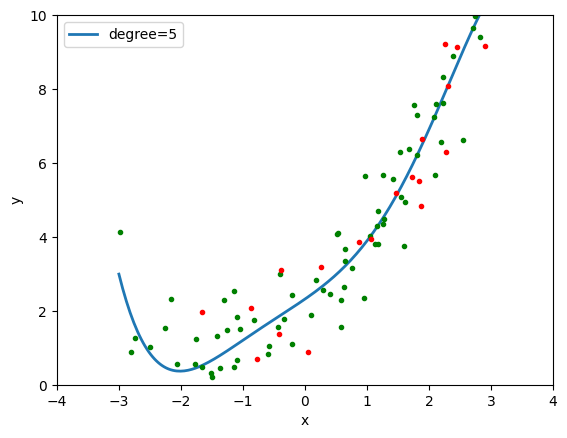

In [35]:
poly_regression(5)

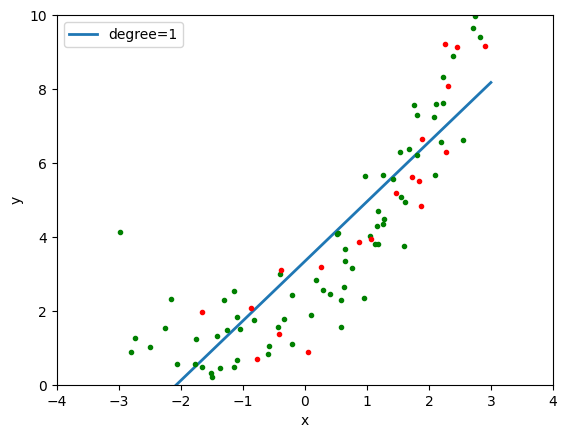

In [36]:
poly_regression(1)

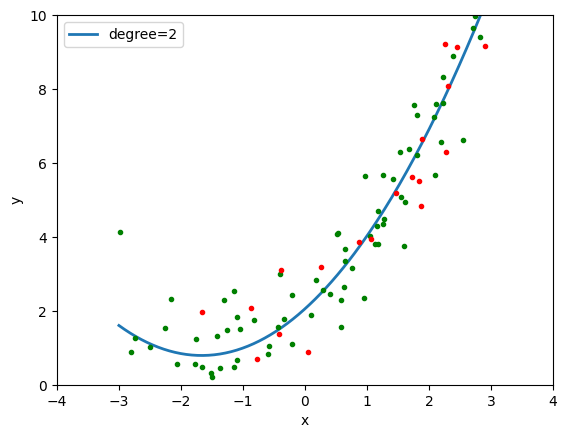

In [37]:
poly_regression(2)

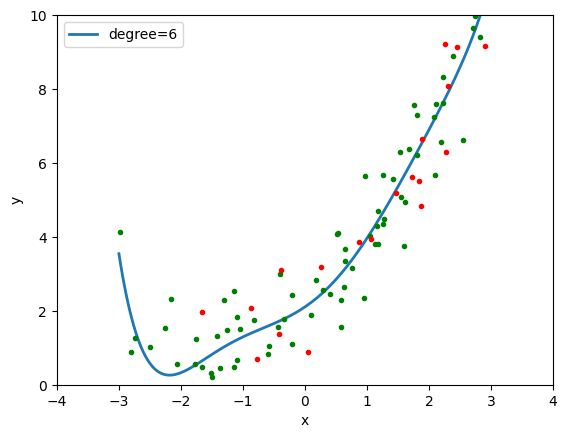

In [38]:
poly_regression(6)

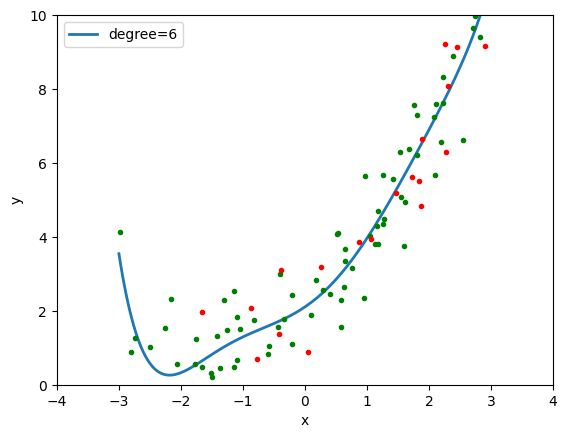

In [41]:
poly_regression(6)